<a href="https://colab.research.google.com/github/junsookim76/Ewha_2025/blob/main/6_MP_QSPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install mordred seaborn rdkit
# !pip install numpy==1.23.5

In [4]:
!wget https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/6_MP_QSPR.csv


--2025-05-28 08:49:21--  https://raw.githubusercontent.com/junsookim76/Ewha_2025/main/6_MP_QSPR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291200 (284K) [text/plain]
Saving to: ‘6_MP_QSPR.csv.2’

6_MP_QSPR.csv.2     100%[===================>] 284.38K  --.-KB/s    in 0.04s   

2025-05-28 08:49:21 (6.93 MB/s) - ‘6_MP_QSPR.csv.2’ saved [291200/291200]



In [5]:
import pandas as pd
import numpy as np

csv_file_name = "6_MP_QSPR.csv"

sample_data = pd.read_csv(csv_file_name,skiprows=1,sep=",")

In [6]:
print(sample_data.shape)
print(sample_data.head(5))

(262, 143)
  Title                      Name  \
0  Mol1    1,2,3-trichlorobenzene   
1  Mol2    1,3,5-trichlorobenzene   
2  Mol3   11a-hydroxyprogesterone   
3  Mol4  17alpha-ethynylestradiol   
4  Mol5           3,4-benzopyrene   

                                              SMILES   ALogP    ALogp2  \
0                            C1=CC(=C(C(=C1)Cl)Cl)Cl  2.5095  6.297590   
1                              C1=C(C=C(C=C1Cl)Cl)Cl  2.5095  6.297590   
2  O=C4\C=C2/[C@]([C@H]1[C@H](O)C[C@@]3(C(C(=O)C)...  0.1509  0.022771   
3  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O)CCC4...  1.5135  2.290682   
4       C1=CC=C2C3=C4C(=CC2=C1)C=CC5=C4C(=CC=C5)C=C3  3.1132  9.692014   

       AMR   BCUTw-1l   BCUTw-1h  BCUTc-1l  BCUTc-1h  ...     WTPT-1  \
0  45.1044  11.998562  34.971057 -0.172315  0.143911  ...  17.382533   
1  45.1044  11.998562  34.971057 -0.177867  0.124170  ...  17.381716   
2  93.4185  11.900000  15.996930 -0.392534  0.206734  ...  49.210219   
3  88.3621  11.996151  15.998265 

In [78]:
X = sample_data.iloc[:,3:-1]
y = sample_data.iloc[:,-1:].values

In [79]:
X.head()

,ALogP,ALogp2,AMR,BCUTw-1l,BCUTw-1h,BCUTc-1l,BCUTc-1h,BCUTp-1l,BCUTp-1h,fragC,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,2.5095,6.297590,45.1044,11.998562,34.971057,-0.172315,0.143911,6.615496,10.155381,72.03,...,179.930033,17.382533,1.931393,7.466759,0.000000,0.0,82,11,2.547,42
1,2.5095,6.297590,45.1044,11.998562,34.971057,-0.177867,0.124170,6.370548,9.182254,72.03,...,179.930033,17.381716,1.931302,7.483715,0.000000,0.0,84,9,2.547,42
2,0.1509,0.022771,93.4185,11.900000,15.996930,-0.392534,0.206734,4.819646,12.609025,2697.03,...,330.219495,49.210219,2.050426,7.551241,7.551241,0.0,1149,51,2.741,142
3,1.5135,2.290682,88.3621,11.996151,15.998265,-0.386831,0.131177,5.036036,12.015619,1939.02,...,296.177630,45.560936,2.070952,5.076087,5.076087,0.0,941,46,3.493,130
4,3.1132,9.692014,93.4252,11.850000,12.150270,-0.182512,0.120933,7.210065,11.609920,916.00,...,252.093900,43.297534,2.164877,0.000000,0.000000,0.0,680,40,5.956,120


In [80]:
y[:5]

array([[ 52.6],
       [ 63.4],
       [222. ],
       [235. ],
       [179. ]])

In [13]:
!pip install --upgrade numpy

!pip install --upgrade tensorflow


  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
mordred 1.2.0 requires numpy==1.*, but you have numpy 2.2.6 which is incompatible.
scikit-image 0.25.2 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.19.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
te

In [ ]:
import os
os.kill(os.getpid(), 9)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [11]:
sample_data.dtypes

,0
Title,object
Name,object
SMILES,object
ALogP,float64
ALogp2,float64
...,...
WPATH,int64
WPOL,int64
XLogP,float64
Zagreb,int64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [88]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

# 모델을 실행합니다.
model.compile(optimizer ='adam', loss = 'mean_absolute_error')

# 20회 이상 결과가 향상되지 않으면 자동으로 중단되게끔 합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 모델의 이름을 정합니다.
modelpath="./MP_full.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(
    filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 실행 관련 설정을 하는 부분입니다. 전체의 20%를 검증셋으로 설정합니다.
history = model.fit(
    X_train, y_train, validation_split=0.25, epochs=1000,
    batch_size=20, callbacks=[early_stopping_callback, checkpointer])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 30)             │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,121 (27.82 KB)

 Trainable params: 7,121 (27.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 204.5390 - val_loss: 96.3932
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 100.8721 - val_loss: 86.4540
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 87.4695 - val_loss: 83.9763
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 78.2315 - val_loss: 73.8573
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 62.5338 - val_loss: 66.6128
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 59.0844 - val_loss: 66.3107
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 56.7232 - val_loss: 69.4850
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 56.6864 - val_loss: 70.1777
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 56.7133 - val_loss: 64.7885
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.3773 - val_loss: 63.2996
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 59.0078 - val_loss: 62.3672
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 

In [89]:
# 예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듭니다.
real_MP =[]
pred_MP = []
X_num = []

# 25개의 샘플을 뽑아 실제 값, 예측 값을 출력해 봅니다.
n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i][0]
    prediction = Y_prediction[i]
    print("실제녹는점: {:.2f}, 예상녹는점: {:.2f}".format(real, prediction))
    real_MP.append(real)
    pred_MP.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
실제녹는점: 58.00, 예상녹는점: 94.36
실제녹는점: 236.00, 예상녹는점: 179.71
실제녹는점: 135.50, 예상녹는점: 191.42
실제녹는점: 219.00, 예상녹는점: 195.62
실제녹는점: 145.00, 예상녹는점: 160.47
실제녹는점: 87.30, 예상녹는점: 34.01
실제녹는점: 255.30, 예상녹는점: 196.55
실제녹는점: 227.50, 예상녹는점: 179.64
실제녹는점: 270.00, 예상녹는점: 271.12
실제녹는점: 238.00, 예상녹는점: 231.50
실제녹는점: 239.80, 예상녹는점: 189.10
실제녹는점: 228.50, 예상녹는점: 215.02
실제녹는점: 163.50, 예상녹는점: 199.11
실제녹는점: 282.00, 예상녹는점: 218.92
실제녹는점: 67.00, 예상녹는점: 126.50
실제녹는점: 116.00, 예상녹는점: 115.80
실제녹는점: 161.50, 예상녹는점: 219.85
실제녹는점: 177.00, 예상녹는점: 153.49
실제녹는점: 167.00, 예상녹는점: 228.51
실제녹는점: 123.00, 예상녹는점: 118.60
실제녹는점: 179.00, 예상녹는점: 228.95
실제녹는점: 221.00, 예상녹는점: 170.78
실제녹는점: 188.00, 예상녹는점: 126.65
실제녹는점: 105.00, 예상녹는점: 166.72
실제녹는점: 129.00, 예상녹는점: 105.46


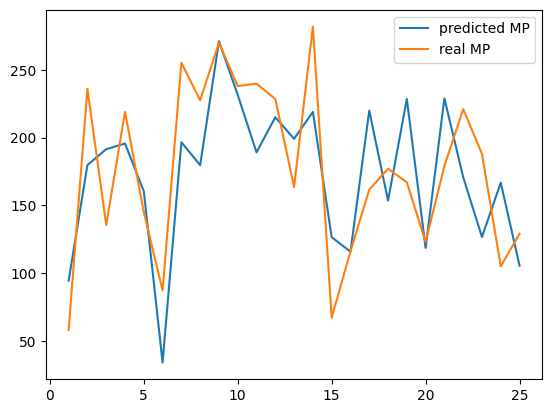

In [90]:
plt.plot(X_num, pred_MP, label='predicted MP')
plt.plot(X_num, real_MP, label='real MP')
plt.legend()
plt.show()